In [1]:
import numpy as np
from skimage import io, color
import cv2
import matplotlib.pyplot as plt

https://www.ic.unicamp.br/~helio/disciplinas/MO443/trabalho2.pdf

## Reading the image

In [2]:
channel = 2

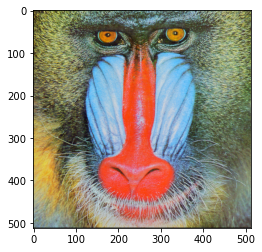

In [3]:
# img = io.imread("monalisa.png")
# io.imshow(img) 
# io.show()
image = cv2.imread('baboon.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
img.shape

(512, 512, 3)

### Converting to CIELab

In [5]:
lab = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lab.shape

(512, 512, 3)

In [6]:
#Define the threshold value to define the 0 or 1
threshold = 128

## Appling the mask

In [7]:
#Set the luminance channel to be used
luminance = lab[:,:,channel]

#Define the matriz with erro of each pixel
# erro = np.zeros([luminance.shape[0], luminance.shape[1]])

#Output image
g = np.zeros([luminance.shape[0],luminance.shape[1]])

In [8]:
# lab2 = lab.copy()

In [9]:
def create_middle_tons(luminance, mask, limit=3):
    """
    Loop to apply the middle tons mask in each pixel of the image
    """
    #loop to check all pixels of the image

    norm_luminance = luminance/255
    g = np.round(norm_luminance)
    
    for row in range(luminance.shape[0]-limit):
        for collumn in range(luminance.shape[1]-limit):

            erro = (luminance[row][collumn] - g[row][collumn])

            #Applyig the mask
            luminance = mask(luminance, erro, row, collumn)
    return luminance*255

## Mask functions

In [10]:
def mask_Steinberg(luminance, erro, row, collumn):
    """
    Apply the Floyd e Steinberg in a pixel of the image, and return the luminance and erro;
    """
    idx_rows = [1,-1,0,1]
    idx_collumns = [0,1,1,1]
    erro_tax = [7/16,3/16,5/16,1/16]
    
    for index in zip(idx_rows, idx_collumns, erro_tax):
        luminance[row+index[0], collumn+index[1]] += (index[2]*erro)*255
#     luminance[row+1][collumn] += (7/16 * erro) * 255
#     luminance[row-1][collumn+1] += (3/16 * erro)* 255
#     luminance[row][collumn+1] += (5/16 * erro) * 255
#     luminance[row+1][collumn+1] += (1/16 * erro)* 255
    
    return luminance 

In [11]:
def mask_Stevenson(luminance, erro, row, collumn):
    """
    Apply the Stevenson in a pixel of the image, and return the luminance and erro;
    """
    #Same line
    luminance[row+2][collumn] +=(32/200) * erro
    
    #Line -1
    luminance[row-3][collumn+1] += (12/200) * erro
    luminance[row-1][collumn+1] += (26/200) * erro
    luminance[row+1][collumn+1] += (30/200) * erro
    luminance[row+3][collumn+1] += (16/200) * erro
    
    #Line -2
    luminance[row-2][collumn+2] += (12/200) * erro
    luminance[row][collumn+2] +=  (26/200) * erro
    luminance[row+2][collumn+2] +=  (12/200) * erro
    
    #Line -3
    luminance[row-3][collumn+3] +=  (5/200) * erro
    luminance[row-1][collumn+3] +=  (12/200) * erro
    luminance[row+1][collumn+3] +=  (12/200) * erro
    luminance[row+3][collumn+3] +=  (5/200) * erro
    
    return luminance 

In [12]:
def mask_Burkes(luminance, erro, row, collumn):
    """
    Apply the Burkes in a pixel of the image, and return the luminance and erro;
    """
    #Same line
    luminance[row+1][collumn] +=  (8/32) * erro
    luminance[row+2][collumn] +=  (4/32) * erro
    
    #Line -1
    luminance[row-2][collumn+1] +=  (2/32) * erro
    luminance[row-1][collumn+1] +=  (4/32) * erro
    luminance[row][collumn+1] +=  (8/32) * erro
    luminance[row+1][collumn+1] += (4/32) * erro
    luminance[row+2][collumn+1] += (2/32) * erro
    
    return luminance 

In [13]:
def mask_Sierra(luminance, erro, row, collumn):
    """
    Apply the Sierra in a pixel of the image, and return the luminance and erro;
    """
    #Same Line
    luminance[row+1][collumn] += (5/32) * erro
    luminance[row+2][collumn] +=  (3/32) * erro
    
    #Line -1
    luminance[row-2][collumn+1] += (2/32) * erro
    luminance[row-1][collumn+1] +=  (4/32) * erro
    luminance[row][collumn+1] +=  (5/32) * erro
    luminance[row+1][collumn+1] +=  (4/32) * erro
    luminance[row+2][collumn+1] += (2/32) * erro
    
    #Line-2
    luminance[row-1][collumn+2] +=  (2/32) * erro
    luminance[row][collumn+2] +=  (3/32) * erro
    luminance[row-1][collumn+2] += (2/32) * erro
    
    return luminance 

In [14]:
def mask_Stucki(luminance, erro, row, collumn):
    """
    Apply the Sierra in a pixel of the image, and return the luminance and erro;
    """
    #Same Line
    luminance[row+1][collumn] +=  (8/42) * erro
    luminance[row+2][collumn] += (4/42) * erro
    
    #Line -1
    luminance[row-2][collumn+1] += (2/42) * erro
    luminance[row-1][collumn+1] += (4/42) * erro
    luminance[row][collumn+1] += (8/42) * erro
    luminance[row+1][collumn+1] += (4/42) * erro
    luminance[row+2][collumn+1] +=  (2/42) * erro
    
    #Line-2
    luminance[row-2][collumn+2] += (1/42) * erro
    luminance[row-1][collumn+2] += (2/42) * erro
    luminance[row][collumn+2] += (4/42) * erro
    luminance[row+1][collumn+2] += (2/42) * erro
    luminance[row+2][collumn+2] += (1/42) * erro
    
    return luminance 

In [15]:
def mask_Jarvis(luminance, erro, row, collumn):
    """
    Apply the Sierra in a pixel of the image, and return the luminance and erro;
    """
    #Same Line
    luminance[row+1][collumn] += (7/48) * erro
    luminance[row+2][collumn] += luminance[row][collumn+2] + (5/48) * erro
    
    #Line -1
    luminance[row-2][collumn+1] += (3/48) * erro
    luminance[row-1][collumn+1] += (5/48) * erro
    luminance[row] [collumn+1]+= (7/48) * erro
    luminance[row+1][collumn+1] += (5/48) * erro
    luminance[row+2][collumn+1] += (3/48) * erro
    
    #Line-2
    luminance[row-2][collumn+2] +=(1/48) * erro
    luminance[row-1][collumn+2] +=(3/48) * erro
    luminance[row][collumn+2] +=(5/48) * erro
    luminance[row+1][collumn+2] += (3/48) * erro
    luminance[row+2][collumn+2] +=(1/48) * erro
    
    return luminance 

## Aplying the masks

In [16]:
# threshold = 0.5

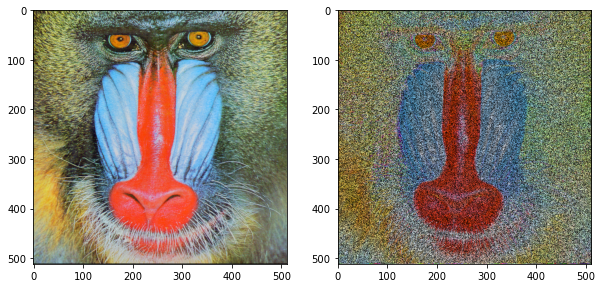

In [17]:
#Floyd e Steinberg Result
lab_Steinberg = lab.copy()
luminance_Steinberg = luminance.copy()

luminance_Steinberg = create_middle_tons(luminance_Steinberg, mask_Steinberg)
lab_Steinberg[:,:,channel] = luminance_Steinberg*255

#Plot the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
ax0.imshow(img)

img_Steinberg_copy = cv2.cvtColor(lab_Steinberg, cv2.COLOR_HSV2RGB)
ax1.imshow(img_Steinberg_copy)

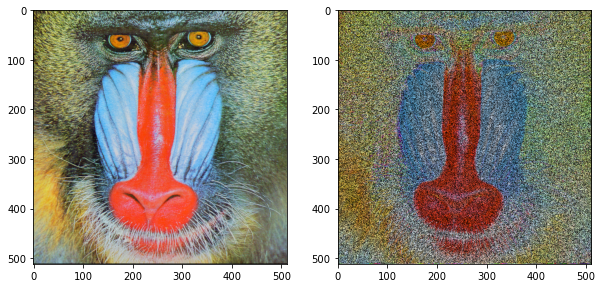

In [17]:
#Floyd e Steinberg Result
lab_Steinberg = lab.copy()
luminance_Steinberg = luminance.copy()

luminance_Steinberg = create_middle_tons(luminance_Steinberg, mask_Steinberg)
lab_Steinberg[:,:,channel] = luminance_Steinberg*255

#Plot the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
ax0.imshow(img)

img_Steinberg_copy = cv2.cvtColor(lab_Steinberg, cv2.COLOR_HSV2RGB)
ax1.imshow(img_Steinberg_copy)

In [24]:
a = [0,1,2,3,4,5,6]
b = [7,8,9,10,11,12]
c = ["a", "b","c","d","e","f","g"]

In [26]:
for i in zip(a,b,c):
    print(i)

(0, 7, 'a')
(1, 8, 'b')
(2, 9, 'c')
(3, 10, 'd')
(4, 11, 'e')
(5, 12, 'f')


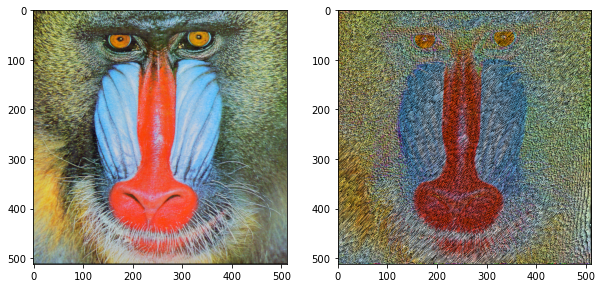

In [19]:
#Jarvis Result
lab_Jarvis = lab.copy()
luminance_Jarvis= luminance.copy()
g_Jarvis = np.zeros([luminance.shape[0], luminance.shape[1]])

luminance_Jarvis = create_middle_tons(luminance_Jarvis, mask_Jarvis, limit=2)
lab_Jarvis[:,:,channel] = luminance_Jarvis

#Plot the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
ax0.imshow(img)

img_Jarvis_copy = cv2.cvtColor(lab_Jarvis, cv2.COLOR_HSV2RGB)
ax1.imshow(img_Jarvis_copy)

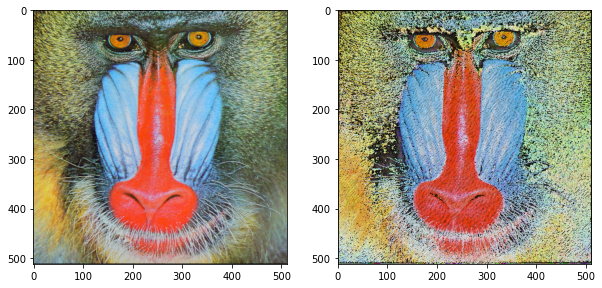

In [20]:
#Stevenson e Arce Result
lab_Stevenson = lab.copy()
luminance_Stevenson = luminance.copy()
g_Stevenson = np.zeros([luminance.shape[0], luminance.shape[1]])

luminance_Stevenson = create_middle_tons(luminance_Stevenson, mask_Stevenson, limit=3)
lab_Stevenson[:,:,channel] = luminance_Stevenson

#Plot the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
ax0.imshow(img)

img_Stevensons_copy = cv2.cvtColor(lab_Stevenson, cv2.COLOR_HSV2RGB)
ax1.imshow(img_Stevensons_copy)

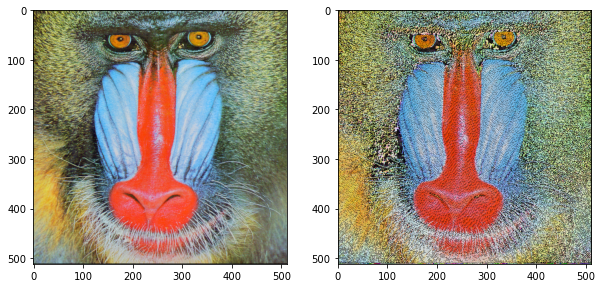

In [21]:
#Burkes Result
lab_Burkes = lab.copy()
luminance_Burkes = luminance.copy()
g_Burkes = np.zeros([luminance.shape[0], luminance.shape[1]])

luminance_Burkes = create_middle_tons(luminance_Burkes, mask_Burkes, limit=2)
lab_Burkes[:,:,channel] = luminance_Burkes

#Plot the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
ax0.imshow(img)

img_Burkes_copy = cv2.cvtColor(lab_Burkes, cv2.COLOR_HSV2RGB)
ax1.imshow(img_Burkes_copy)

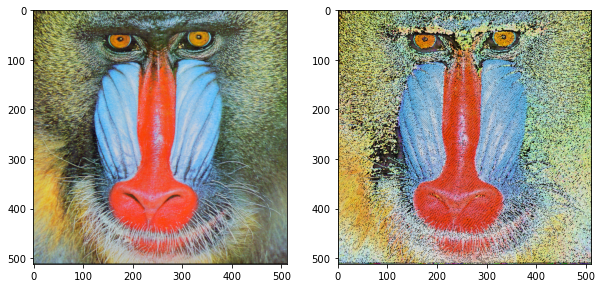

In [22]:
#Sierra Result
lab_Sierra= lab.copy()
luminance_Sierra = luminance.copy()
g_Sierra = np.zeros([luminance.shape[0], luminance.shape[1]])

luminance_Sierra = create_middle_tons(luminance_Sierra, mask_Sierra, limit=2)
lab_Sierra[:,:,channel] = luminance_Sierra

#Plot the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
ax0.imshow(img)

img_Sierra_copy = cv2.cvtColor(lab_Sierra, cv2.COLOR_HSV2RGB)
ax1.imshow(img_Sierra_copy)

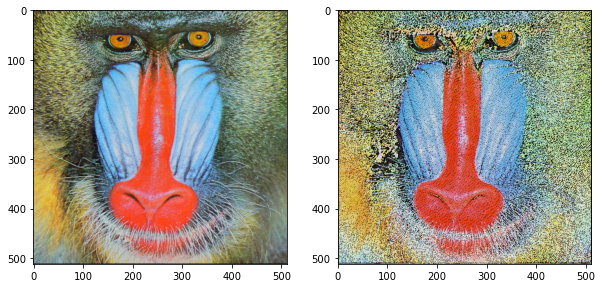

In [23]:
#StuckiResult
lab_Stucki= lab.copy()
luminance_Stucki= luminance.copy()
g_Stucki = np.zeros([luminance.shape[0], luminance.shape[1]])

luminance_Stucki = create_middle_tons(luminance_Stucki, mask_Stucki, limit=2)
lab_Stucki[:,:,channel] = luminance_Stucki

#Plot the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
ax0.imshow(img)

img_Stucki_copy = cv2.cvtColor(lab_Stucki, cv2.COLOR_HSV2RGB)
ax1.imshow(img_Stucki_copy)